In [22]:
%pip install sentence-transformers scikit-learn matplotlib tensorflow tf-keras rouge-score

Note: you may need to restart the kernel to use updated packages.


## Cosine Similarity with Sentence Embeddings:

In [ ]:
import pandas as pd
import tensorflow as tf

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Suppress TensorFlow warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Check if TensorFlow is installed
try:
    from tensorflow import keras
except (ModuleNotFoundError, ImportError):
    print("TensorFlow is not installed. Please install it using 'pip install tensorflow'.")

# Load the predictions data
data = pd.read_csv('predictions.csv') 
data.shape


(903, 3)

In [ ]:
# Extract reference and generated summaries from the data
reference_summaries = data['Actual Text'].tolist()
generated_summaries = data['Generated Text'].tolist()

# Load a pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for both reference and generated summaries
reference_embeddings = model.encode(reference_summaries, convert_to_tensor=False)
generated_embeddings = model.encode(generated_summaries, convert_to_tensor=False)


In [25]:

# Compute cosine similarity between each pair of reference and generated embeddings
cosine_similarities = cosine_similarity(reference_embeddings, generated_embeddings)

# Extract the diagonal (corresponding pairs)
cosine_scores = cosine_similarities.diagonal()

# Add the cosine similarity scores to the dataframe
data['cosine_similarity'] = cosine_scores

In [26]:
# Save the updated data with cosine similarity scores for reference
data.to_csv('predictions_with_cosine_similarity.csv', index=False)


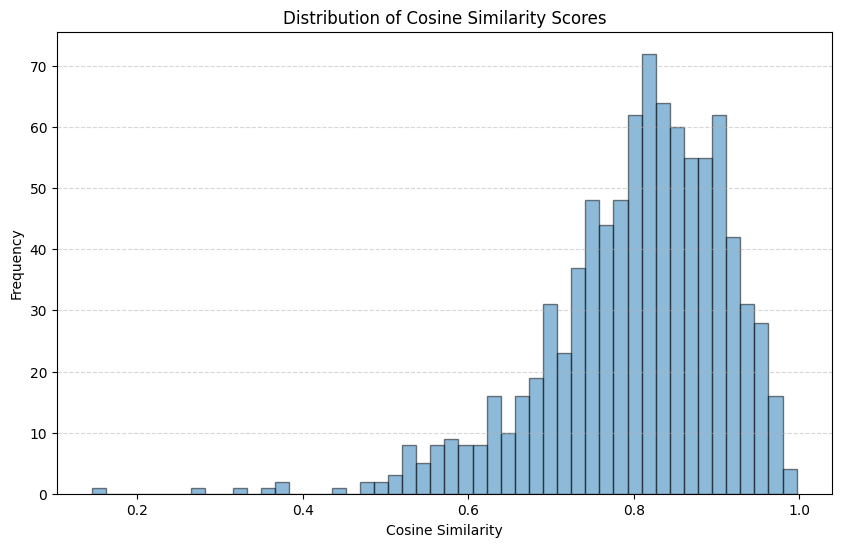

Average Cosine Similarity: 0.80251783


In [27]:
import matplotlib.pyplot as plt

# Load the data with cosine similarity scores
data_with_similarity = pd.read_csv('predictions_with_cosine_similarity.csv')

# Plot the histogram for cosine similarity distribution
plt.figure(figsize=(10, 6))
plt.hist(data_with_similarity['cosine_similarity'], bins=50, edgecolor='black', alpha=0.5)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Average Cosine Similarity:", cosine_scores.mean())




## Similarity Scores by Chat GPT 4.o

The similarity score was calculated using **cosine similarity** with **TF-IDF (Term Frequency-Inverse Document Frequency)**, a common method for assessing text similarity. Here’s a breakdown of the process:

1. **Text Vectorization with TF-IDF**: 
   - Each "Generated Text" and "Actual Text" pair was transformed into numerical vectors using the TF-IDF vectorizer. This step assigns higher weights to terms that are unique to a document and lower weights to common terms, highlighting each text's unique content.

2. **Cosine Similarity Calculation**:
   - Cosine similarity measures the cosine of the angle between two vectors in multi-dimensional space. If two texts are identical, the cosine similarity score will be 1 (cosine of 0 degrees), and if they are completely dissimilar, the score will be 0. This results in a similarity score that effectively ranges between 0 and 1.

3. **Score Assignment**:
   - The calculated similarity score was then added as a "Similarity Score" column in the dataset, allowing a comparison of each "Generated Text" and "Actual Text" pair.

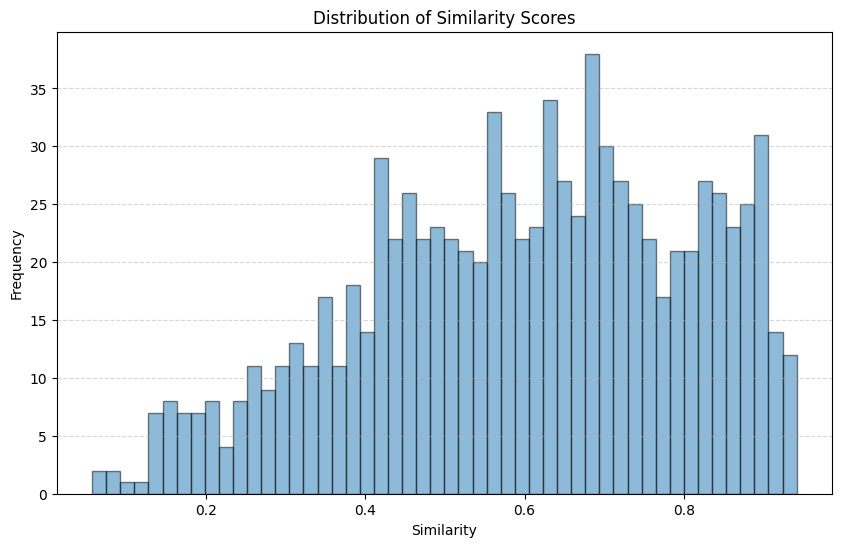

Average Similarity Score by GPT: 0.5974696872541249


In [28]:

# Load the data with cosine similarity scores
data_with_similarity = pd.read_csv('GPT_Similarity_Scored_Data.csv')

# Plot the histogram for cosine similarity distribution
plt.figure(figsize=(10, 6))
plt.hist(data_with_similarity['Similarity Score'], bins=50, edgecolor='black', alpha=0.5)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Print average Similarity Score by GPT
avg_GPT_Similarity = data_with_similarity['Similarity Score'].mean()
print("Average Similarity Score by GPT:", avg_GPT_Similarity)

## ROUGE scores

In [32]:
from rouge_score import rouge_scorer

# Load the data
data = pd.read_csv('predictions.csv')

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Lists to store individual scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

In [30]:

# Iterate through each summary pair and compute ROUGE scores
for i, row in data.iterrows():
    scores = scorer.score(row['Actual Text'], row['Generated Text'])
    rouge_1_scores.append(scores['rouge1'].fmeasure)
    rouge_2_scores.append(scores['rouge2'].fmeasure)
    rouge_l_scores.append(scores['rougeL'].fmeasure)

# Calculate the average scores for each ROUGE metric
avg_rouge_1 = sum(rouge_1_scores) / len(rouge_1_scores)
avg_rouge_2 = sum(rouge_2_scores) / len(rouge_2_scores)
avg_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)


In [31]:

# Print the average scores
print(f'Average ROUGE-1 Score: {avg_rouge_1:.4f}')
print(f'Average ROUGE-2 Score: {avg_rouge_2:.4f}')
print(f'Average ROUGE-L Score: {avg_rouge_l:.4f}')



Average ROUGE-1 Score: 0.5320
Average ROUGE-2 Score: 0.3507
Average ROUGE-L Score: 0.4266
